# Week 3: Day 3 PM // Anomaly Detection

**Generate Data for Outlier Detection**

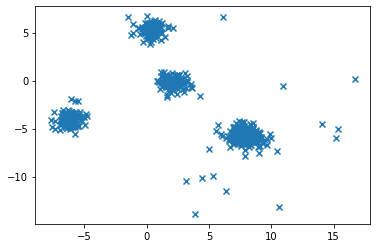

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=5)
X_append, y_true_append = make_blobs(n_samples=20,centers=1, cluster_std=5,random_state=5)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1] 
plt.scatter(X[:,0],X[:,1],marker="x");

**Generate Data for Novelty Detection**

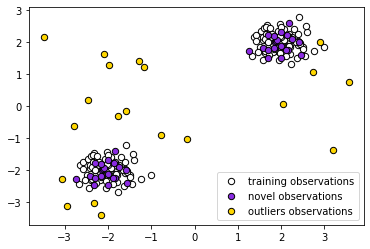

In [47]:
X_1 = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X_1 + 2, X_1 - 2]
# Generate some regular novel observations
X_1 = 0.3 * np.random.randn(20, 2)
X_novel = np.r_[X_1 + 2, X_1 - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=40, edgecolors="k",label='training observations')
plt.scatter(X_novel[:, 0], X_test[:, 1], c="blueviolet", s=40, edgecolors="k", label='novel observations')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=40, edgecolors="k", label='outliers observations')
plt.legend()

## Gaussian Mixture

### Outlier Detection

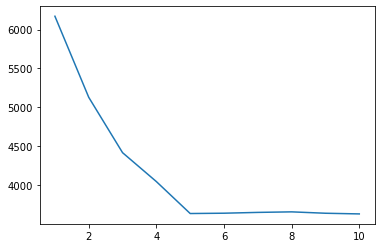

In [19]:
aic = []
for i in range(1,11):
    aic.append(GaussianMixture(n_components=i).fit(X).aic(X))

plt.plot(range(1,11), aic)

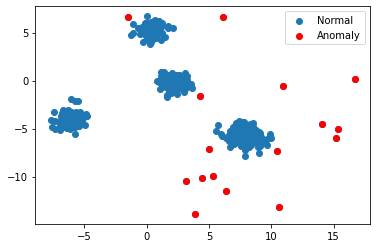

In [65]:
gausMix = GaussianMixture(n_components=5).fit(X)

scores = gausMix.score_samples(X)
thresh = np.quantile(scores, 0.03)

index = np.where(scores <= thresh)
outliers = X[index]

plt.scatter(X[:,0], X[:,1],label='Normal')
plt.scatter(outliers[:,0],outliers[:,1], color='r', label='Anomaly')
plt.legend()
plt.show()

In [16]:
gausMix.aic(X)

4297.7579104376855

### Novelty Detection

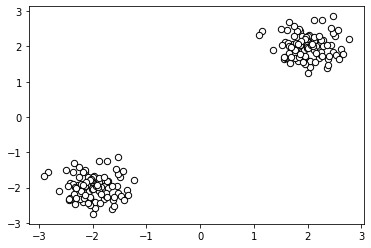

In [26]:
plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=40, edgecolors="k",label='training observations')

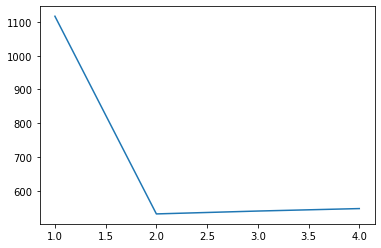

In [28]:
aic = []
for i in range(1,5):
    aic.append(GaussianMixture(n_components=i).fit(X_train).aic(X_train))

plt.plot(range(1,5), aic)

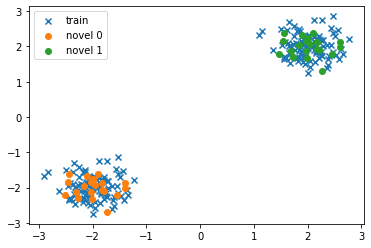

In [39]:
gausMix = GaussianMixture(n_components=2).fit(X_train)
novel = gausMix.predict(X_novel)

idx_novel_0 = np.where(novel==0)
idx_novel_1 = np.where(novel==1)

plt.scatter(X_train[:,0],X_train[:,1],marker='x',label='train')
plt.scatter(X_novel[idx_novel_0,0],X_novel[idx_novel_0,1],marker='o',label='novel 0')
plt.scatter(X_novel[idx_novel_1,0],X_novel[idx_novel_1,1],marker='o',label='novel 1')
plt.legend()

## Isolation Forest

### Outlier Detection

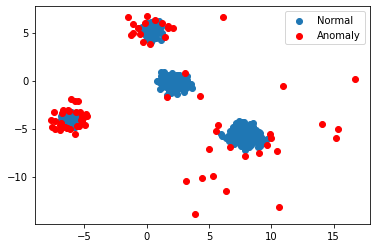

In [66]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=50)
clf.fit(X)
labels = clf.predict(X)

normal = np.where(labels==1)
outlier = np.where(labels==-1)

plt.scatter(X[normal,0], X[normal,1],label='Normal')
plt.scatter(X[outlier,0],X[outlier,1], color='r',label='Anomaly')
plt.legend()
plt.show()

### Novelty Detection

X_outliers label: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


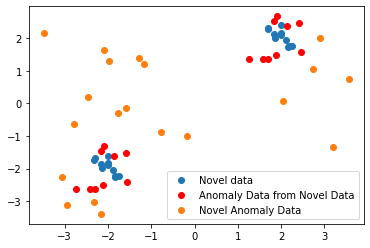

In [70]:
clf = IsolationForest(n_estimators=50)
clf.fit(X_train)
labels = clf.predict(X_novel)
out_nov = clf.predict(X_outliers)
print('X_outliers label:',out_nov)

normal = np.where(labels==1)
outlier = np.where(labels==-1)

plt.scatter(X_novel[normal,0], X_novel[normal,1], label='Novel data')
plt.scatter(X_novel[outlier,0],X_novel[outlier,1], color='r', label='Anomaly Data from Novel Data')
plt.scatter(X_outliers[:,0],X_outliers[:,1], label = 'Novel Anomaly Data')
plt.legend()
plt.show()

## One-Class SVM

### Outlier Detection

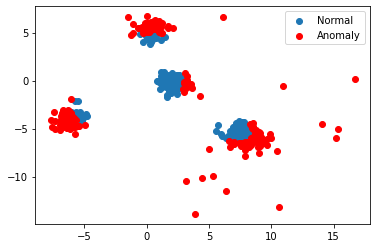

In [71]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(kernel='rbf')
clf.fit(X)
labels = clf.predict(X)

normal = np.where(labels==1)
outlier = np.where(labels==-1)

plt.scatter(X[normal,0], X[normal,1],label='Normal')
plt.scatter(X[outlier,0],X[outlier,1], color='r',label='Anomaly')
plt.legend()
plt.show()

### Novelty Detection

X_outliers label: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


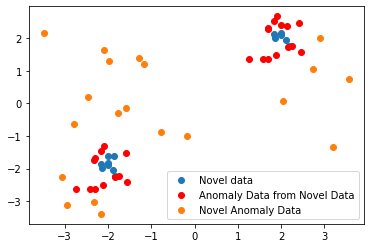

In [72]:
clf = OneClassSVM(kernel='rbf')
clf.fit(X_train)
labels = clf.predict(X_novel)
out_nov = clf.predict(X_outliers)
print('X_outliers label:',out_nov)

normal = np.where(labels==1)
outlier = np.where(labels==-1)

plt.scatter(X_novel[normal,0], X_novel[normal,1], label='Novel data')
plt.scatter(X_novel[outlier,0],X_novel[outlier,1], color='r', label='Anomaly Data from Novel Data')
plt.scatter(X_outliers[:,0],X_outliers[:,1], label = 'Novel Anomaly Data')
plt.legend()
plt.show()

## Local Outlier Factor

### Outlier Detection

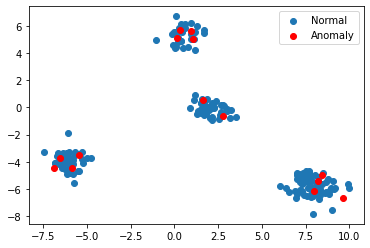

In [78]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=15)
labels = lof.fit_predict(X_train)

normal = np.where(labels==1)
outlier = np.where(labels==-1)

plt.scatter(X[normal,0], X[normal,1],label='Normal')
plt.scatter(X[outlier,0],X[outlier,1], color='r',label='Anomaly')
plt.legend()
plt.show()

### Novelty Detection

X_outliers label: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


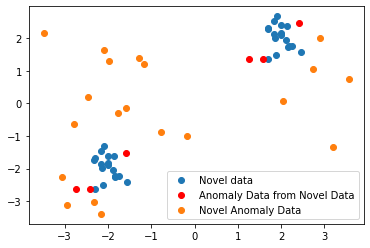

In [79]:
lof = LocalOutlierFactor(n_neighbors=15, novelty=True)
lof.fit(X_train)
labels = lof.predict(X_novel)
out_nov = lof.predict(X_outliers)
print('X_outliers label:',out_nov)

normal = np.where(labels==1)
outlier = np.where(labels==-1)

plt.scatter(X_novel[normal,0], X_novel[normal,1], label='Novel data')
plt.scatter(X_novel[outlier,0],X_novel[outlier,1], color='r', label='Anomaly Data from Novel Data')
plt.scatter(X_outliers[:,0],X_outliers[:,1], label = 'Novel Anomaly Data')
plt.legend()
plt.show()